<a href="https://colab.research.google.com/github/SebaCarrilloS/Formacion-Data-Science/blob/main/Desaf%C3%ADo_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafío 3 - Aprendizaje supervisado y no supervisado (Parte II)**

Nombre: Sebastián Carrillo

Curso: Machine Learning (G80)

#**Descripción**

En la industria de las telecomunicaciones, la retención de clientes es un desafío clave para las empresas. La fuga de clientes, también conocida como churn, es un problema que puede tener un impacto significativo en los ingresos y la reputación de una empresa. Anticiparse a la fuga de clientes y tomar medidas preventivas para retenerlos se ha convertido en una prioridad estratégica. En este contexto, el objetivo de esta tarea es utilizar técnicas de machine learning para desarrollar un modelo que pueda predecir la probabilidad de fuga de clientes en una empresa de telecomunicaciones.


El objetivo principal de este proyecto es utilizar un enfoque basado en machine learning para construir un modelo predictivo de fuga de clientes. El modelo será capaz de clasificar a los clientes como "fugados" o "no fugados" en función de un conjunto de variables relevantes. El objetivo es proporcionar a la empresa de telecomunicaciones una herramienta eficaz para identificar a los clientes en riesgo de abandonar sus servicios, lo que permitirá tomar
medidas proactivas para retenerlos.

Para lograr este objetivo, se utilizará un conjunto de datos históricos de la base de datos `Telco-Customer-Churn.csv` que contiene información detallada sobre los clientes como la duración de la suscripción, el uso de servicios, los tipos de servicios contratados, el historial
de pagos y más. Estos datos servirán como base para entrenar y validar el modelo predictivo. Se emplearán diversas técnicas de preprocesamiento de datos, selección de características y entrenamiento de modelos de clasificación como árboles de decisión, Naive Bayes o regresión logística, con el fin de obtener el mejor rendimiento posible.


El resultado final será un modelo de clasificación preciso y confiable, capaz de predecir la probabilidad de fuga de clientes en la empresa de telecomunicaciones. Este modelo permitirá a la empresa identificar y priorizar a los clientes en riesgo, lo que a su vez facilitará la implementación de estrategias específicas de retención de clientes. Además, se espera que el proyecto proporcione una comprensión más profunda de los factores y las variables que influyen en la fuga de clientes en la industria de las telecomunicaciones.

En resumen, este proyecto tiene como objetivo principal aplicar técnicas de machine learning para desarrollar un modelo predictivo de fuga de clientes en la industria de las telecomunicaciones. El modelo resultante permitirá identificar a los clientes en riesgo de abandonar los servicios de la empresa y tomar acciones preventivas para retenerlos. A través de este enfoque, se busca mejorar la retención de clientes, aumentar la satisfacción y mejorar el rendimiento general de la empresa en un entorno altamente competitivo.

#**Requerimientos**


## 1. Realizar un análisis exploratorio de los datos para comprender las características y la distribución de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('/content/drive/MyDrive/Formación Data Science/Desafío Latam/Módulo 5 - Machine Learning/Desafios/Desafio 3/Telco-Customer-Churn.xlsx')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<Axes: xlabel='Churn', ylabel='count'>

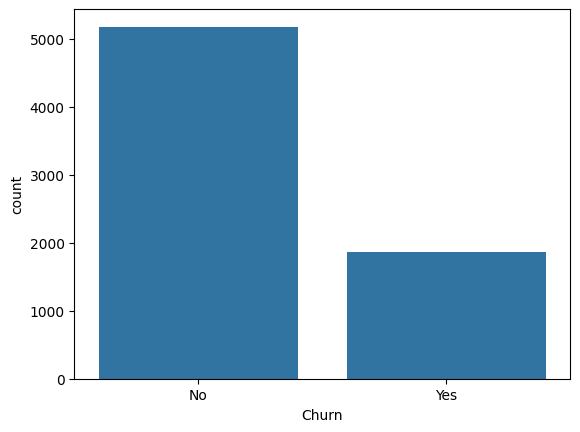

In [8]:
sns.countplot(x='Churn',data=df)

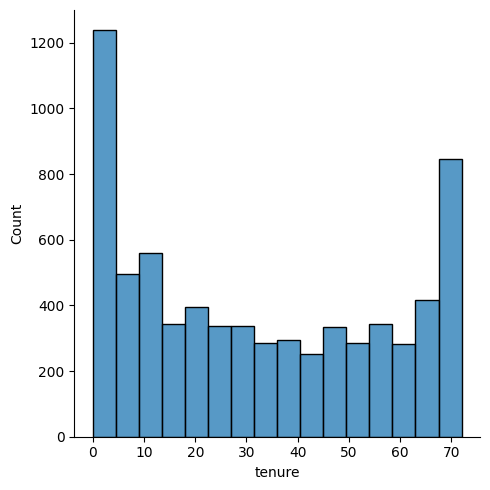

In [9]:
sns.displot(df['tenure'])

Text(0.5, 1.0, 'Total Charges')

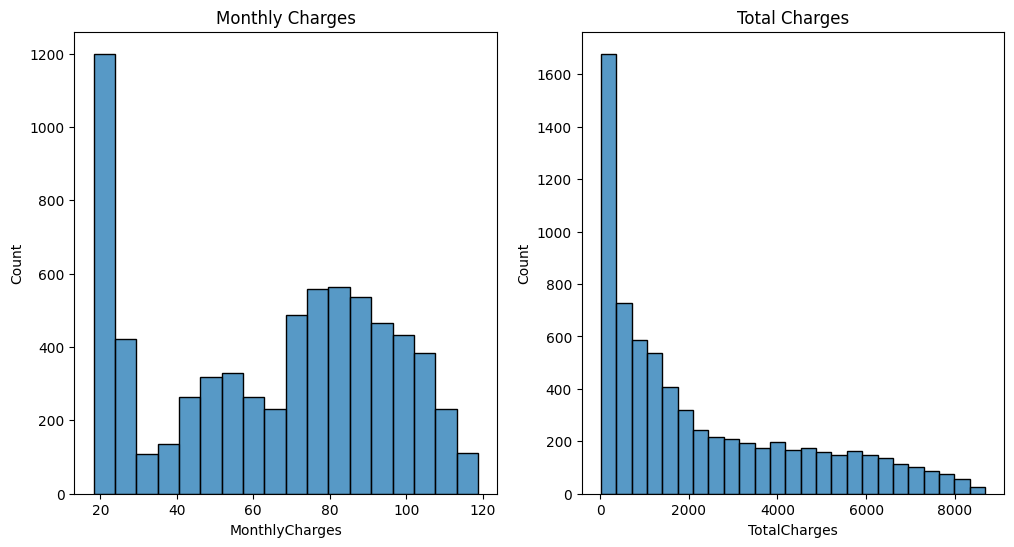

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['MonthlyCharges'], ax=axes[0])
axes[0].set_title('Monthly Charges')

sns.histplot(df['TotalCharges'], ax=axes[1])
axes[1].set_title('Total Charges')

Text(0.5, 1.0, 'Total Charges')

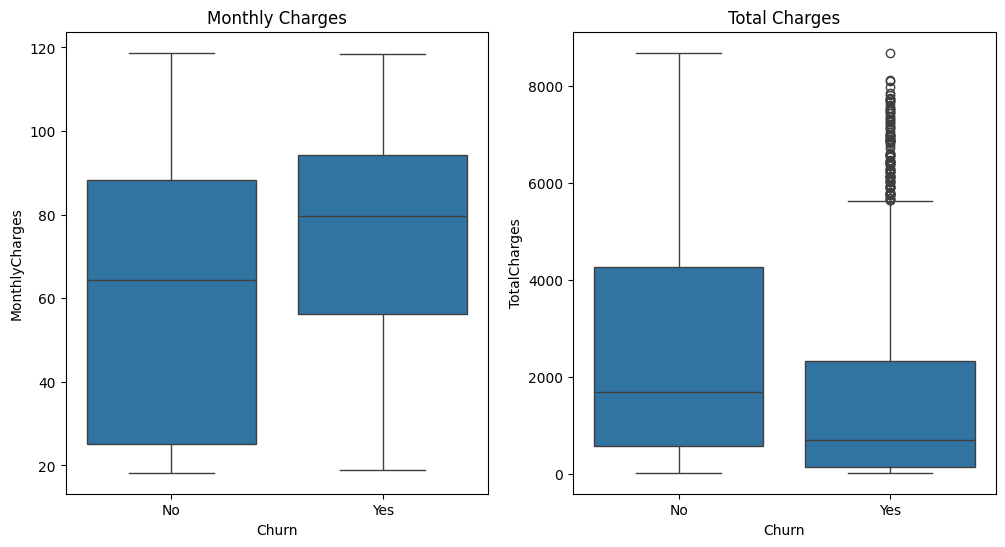

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Churn',y='MonthlyCharges',data=df,ax=axes[0])
axes[0].set_title('Monthly Charges')

sns.boxplot(x='Churn',y='TotalCharges',data=df,ax=axes[1])
axes[1].set_title('Total Charges')

<Axes: xlabel='Contract', ylabel='count'>

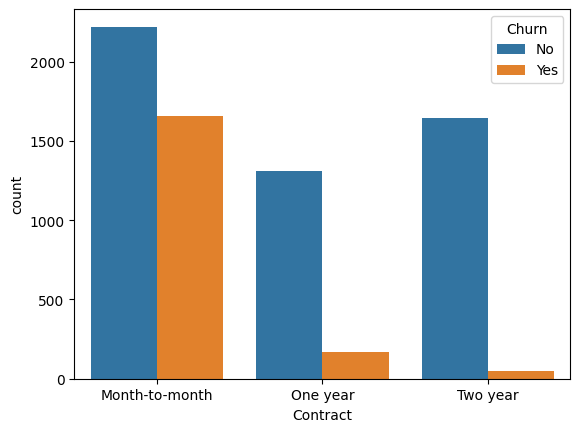

In [12]:
sns.countplot(data=df, x='Contract', hue='Churn')

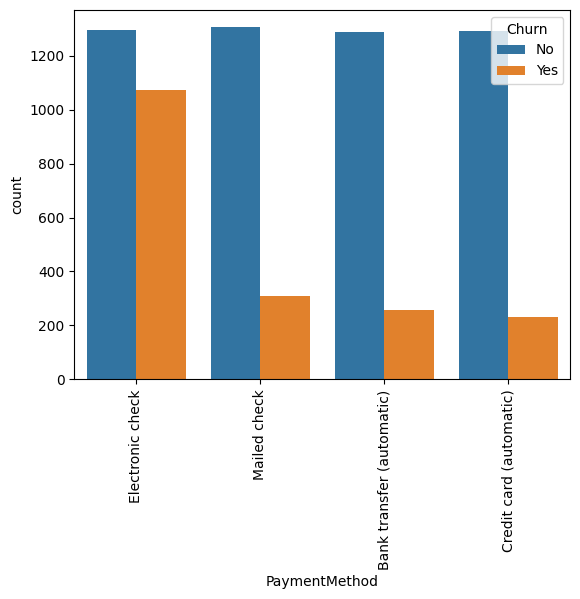

In [13]:
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
xticks=plt.xticks(rotation=90)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

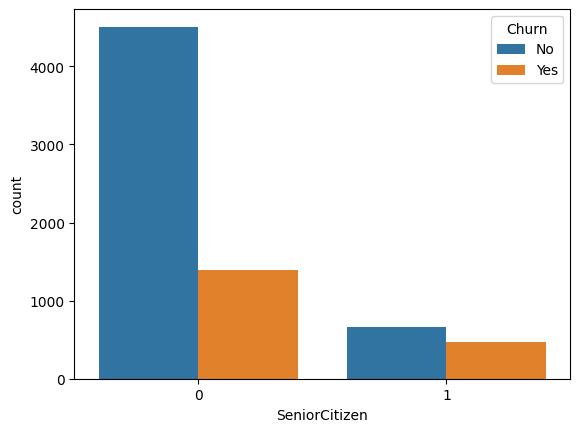

In [14]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

<Axes: xlabel='TechSupport', ylabel='count'>

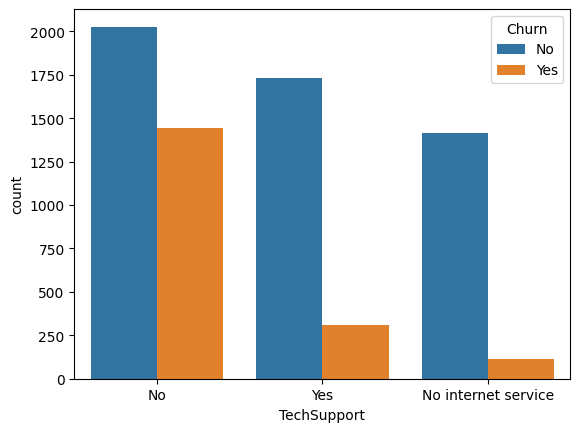

In [15]:
sns.countplot(data=df, x='TechSupport', hue='Churn')

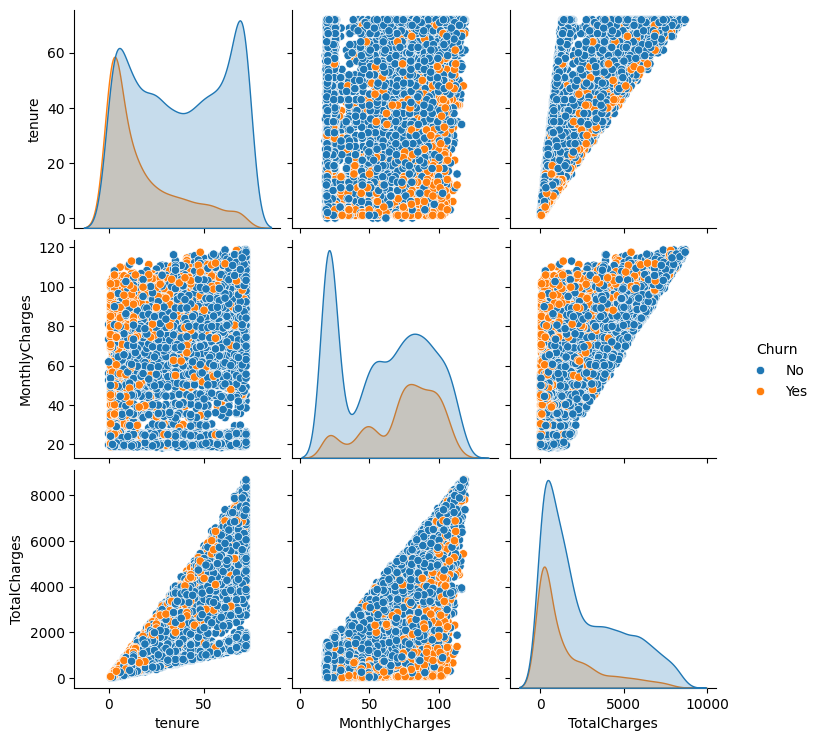

In [16]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

Text(0.5, 1.0, 'Churn por tipo de servicio de internet')

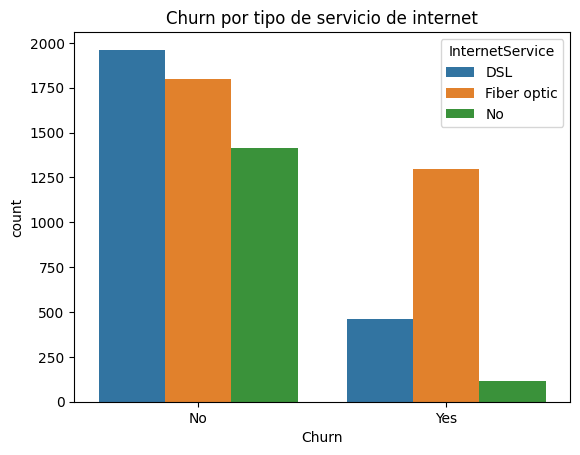

In [17]:
sns.countplot(x='Churn', hue='InternetService', data=df)
plt.title('Churn por tipo de servicio de internet')


###**Conclusiones de la exploración de datos:**
- Se puede ver que los SeniorCitizen tienden más a salir porcentualmente que los que no lo son.
- Mayoría de clientes que rotan también lo hacen quienes poseen fibra óptica como servicio de Internet.
- También es mayor la proporción de clientes que rotan entre quienes no poseen servicio de internet.
- La mayoría de quienes se retiran del servicio tienen un bajo cargo anual, pero si un cargo mensual mayor de quienes se mantienen en servicio.


## 2. Preprocesar los datos, incluyendo la limpieza, la transformación y la normalización de las características según sea necesario.


In [18]:
df=df.drop(df[df['TotalCharges'].isnull()].index)

In [19]:
df.duplicated().sum()

0

In [20]:
df=pd.get_dummies(df,columns=['Churn','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],drop_first=True)

In [21]:
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,True,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn_Yes                              7032 non-null   bool   
 6   gender_Male                            7032 non-null   bool   
 7   Partner_Yes                            7032 non-null   bool   
 8   Dependents_Yes                         7032 non-null   bool   
 9   PhoneService_Yes                       7032 non-null   bool   
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

In [23]:
## Eliminamos columna de customerID, ya que no nos aporta para resultados.
df=df.drop(['customerID'],axis=1)

In [24]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,-0.008392,...,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,-0.007877,...,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,-0.248033,...,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,-0.113008,...,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn_Yes,0.150541,-0.354049,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,-0.011691,...,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,0.007515,...,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,-0.018397,...,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,0.001078,...,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,-1.000000,...,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,-0.011691,0.007515,-0.018397,0.001078,-1.000000,1.000000,...,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463


In [48]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

corr_df = corr_matrix.unstack().reset_index()
corr_df.columns = ['Variable1', 'Variable2', 'Correlación']

corr_df = corr_df[(corr_df['Correlación'] != 1) & (corr_df['Correlación'] != -1) & (corr_df['Variable1'] != corr_df['Variable2']) & (corr_df['Variable1'] < corr_df['Variable2'])]

corr_df = corr_df.sort_values(by='Correlación', ascending=False)
corr_df.head(10)



,Variable1,Variable2,Correlación
94,TotalCharges,tenure,0.825880
343,InternetService_Fiber optic,MonthlyCharges,0.787195
65,MonthlyCharges,TotalCharges,0.651065
84,MonthlyCharges,StreamingTV_Yes,0.629668
86,MonthlyCharges,StreamingMovies_Yes,0.627235
807,Contract_Two year,tenure,0.563801
766,StreamingMovies_Yes,StreamingTV_Yes,0.533380
561,DeviceProtection_Yes,TotalCharges,0.522881
747,StreamingMovies_Yes,TotalCharges,0.519867
685,StreamingTV_Yes,TotalCharges,0.515709


### **Conclusiones de correlación:**
- `tenure` y `TotalCharges` poseen una correlación muy alta (0.826), dado que a medida que los clientes permanecen más tiempo suscritos, tienden a acumular mayores cargos totales, lo que podría deberse a la contratación de servicios adicionales o aumentos en las tarifas.
- `InternetService_Fiber optic` y `MonthlyCharges` también poseen correlación alta (0.787). Esto sugiere que los clientes de fibra óptica suelen tener planes más caros.
- `MonthlyCharges` y los servicios de streaming: Estas variables poseen una alta correlación también. Esto indica que los clientes que contratan servicios de streaming tienden a tener planes más caros.
- `Contract_Two year` y `tenure`posee una correlación positiva moderada entre tener un contrato de dos años y la duración de la suscripción. Esto sugiere que los clientes con contratos a largo plazo tienden a permanecer más tiempo.




## 3. Dividir los datos en conjuntos de entrenamiento y prueba.

In [26]:
MX=df.drop('Churn_Yes',axis=1)
y=df['Churn_Yes']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Entrenar al menos 3 algoritmos y optimizar sus hiperparametros

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
model1=LogisticRegression()
model2=KNeighborsClassifier()
model3=DecisionTreeClassifier()

In [31]:
param_gridKNN={'n_neighbors': np.arange(1,10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}
param_gridDT={'max_depth':np.arange(1,10),'min_samples_split': [2, 10, 20],'min_samples_leaf': [1, 5, 10]}

In [32]:
model1.fit(X_train,y_train)

LogisticRegression()

In [33]:
grid_searchKNN=GridSearchCV(model2,param_gridKNN,cv=10)
grid_searchDT=GridSearchCV(model3,param_gridDT,cv=10)

In [34]:
grid_searchKNN.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [35]:
grid_searchDT.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

## 5. Evaluar el rendimiento de los modelos utilizando métricas de evaluación pertinentes, como precisión, sensibilidad, valor F1, entre otras.

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
y_pred_LR=model1.predict(X_test)
y_pred_KNN=grid_searchKNN.predict(X_test)
y_pred_DT=grid_searchDT.predict(X_test)

In [38]:
print("Accuracy Score para Logistic Regression")
print(f"{np.round(accuracy_score(y_test,y_pred_LR),2)*100}%")
print("---------------------------")
print("Accuracy Score para KNN")
print(f"{np.round(accuracy_score(y_test,y_pred_KNN),2)*100}%")
print("---------------------------")
print("Accuracy Score para Árbol de Decisión")
print(f"{np.round(accuracy_score(y_test,y_pred_DT),2)*100}%")

Accuracy Score para Logistic Regression
79.0%
---------------------------
Accuracy Score para KNN
77.0%
---------------------------
Accuracy Score para Árbol de Decisión
78.0%


In [39]:
confusion_matrix(y_test,y_pred_LR)

array([[1151,  149],
       [ 221,  237]])

In [40]:
confusion_matrix(y_test,y_pred_KNN)

array([[1148,  152],
       [ 257,  201]])

In [41]:
confusion_matrix(y_test,y_pred_DT)

array([[1166,  134],
       [ 256,  202]])

In [42]:
print("Regresión Logística")
print(classification_report(y_test,y_pred_LR))
print("---------------------------")
print("KNN")
print(classification_report(y_test,y_pred_KNN))
print("---------------------------")
print("Árbol de Decisión")
print(classification_report(y_test,y_pred_DT))

Regresión Logística
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1300
        True       0.61      0.52      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758

---------------------------
KNN
              precision    recall  f1-score   support

       False       0.82      0.88      0.85      1300
        True       0.57      0.44      0.50       458

    accuracy                           0.77      1758
   macro avg       0.69      0.66      0.67      1758
weighted avg       0.75      0.77      0.76      1758

---------------------------
Árbol de Decisión
              precision    recall  f1-score   support

       False       0.82      0.90      0.86      1300
        True       0.60      0.44      0.51       458

    accuracy                           0.78      1758
   macro avg       0.71      0

### **Conclusiones de los modelos:**
1. Modelos poseen un comportamiento similar, sin embargo, precisión de modelo Logístico es ligeramente superior respecto a otros 2 modelos.
2. Si bien la precisión en el modelo KNN es ligeramente más alta para la clase "False" (no churn), la Regresión Logística tiene una mejor recall para la clase "True" (churn), lo que es importante para identificar correctamente a los clientes que se irán. Por tanto, y además de la precisión y el recall, la regresión logísitca ofrece un mejor equilibrio.
3. Modelo de regresión logísitica es más interpretable, lo que facilita entender cómo las características contribuyen a la predicción

